In [20]:
from parallel_sync import wget
import os
from tqdm import tqdm
from bs4 import BeautifulSoup as bs
from urllib.parse import urljoin, urlparse
import re
import requests

In [3]:
def is_downloadable(url):
    """
    Does the url contain a downloadable resource
    """
    h = requests.head(url, allow_redirects=True)
    header = h.headers
    content_type = header.get('content-type')
    if 'text' in content_type.lower():
        return False
    if 'html' in content_type.lower():
        return False
    return True

In [4]:
def is_valid(url):
    """
    Checks whether `url` is a valid URL.
    """
    parsed = urlparse(url)
    return bool(parsed.netloc) and bool(parsed.scheme)

In [5]:
def get_all_images(url):
    """
    Returns all image URLs on a single `url`
    """
    soup = bs(requests.get(url).content, "html.parser")
    urls = []
    for img in tqdm(soup.find_all("a", href = re.compile("\.IMG$")), "Extracting images"):
        img_url = img.attrs.get("href")
        if not img_url:
            # if img does not contain src attribute, just skip
            continue
        # make the URL absolute by joining domain with the URL that is just extracted
        img_url = urljoin(url, img_url)
        try:
            pos = img_url.index("?")
            img_url = img_url[:pos]
        except ValueError:
            pass
        # finally, if the url is valid
        if is_valid(img_url):
            urls.append(img_url)
    return urls

In [7]:
def extract(url):
    # get all images
    imgs = get_all_images(url)
    return imgs

In [ ]:
def main3(imgs):
    wget.download(imgs)

In [10]:
doy = "2011_207"
imgs = extract("https://pdsimage2.wr.usgs.gov/archive/mess-e_v_h-mdis-2-edr-rawdata-v1.0/MSGRMDS_1001/DATA/"+doy+"/")

Extracting images: 100%|██████████| 126/126 [00:00<00:00, 12031.47it/s]


In [ ]:
main3(imgs)

In [29]:
def display(filename):
    fp = filename
    raster = rasterio.open(fp)
    array = raster.read(1)
    plt.figure(figsize=(12,12))
    plt.imshow(array)
    plt.show()

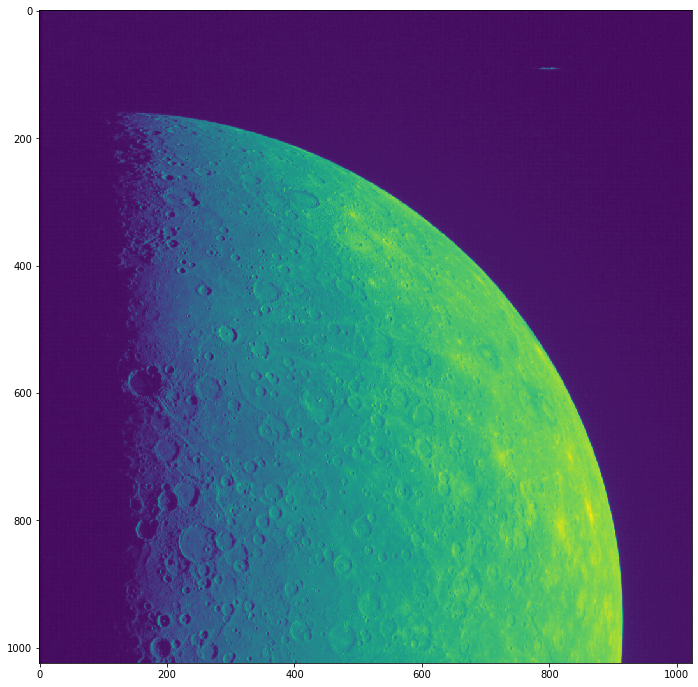

In [16]:
import rasterio
from matplotlib import pyplot as plt
fp = r"data/2011_207/EW0220137668G.IMG"

raster = rasterio.open(fp)
array = raster.read(1)
plt.figure(figsize=(12,12))
plt.imshow(array)
plt.show()

#print(type(raster))

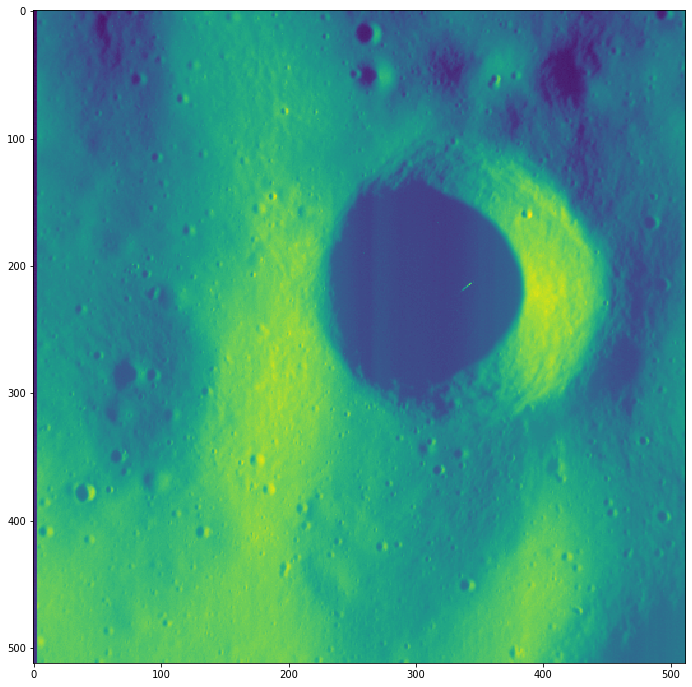

In [17]:
fp = r"data/2014_215/EN1049375684M.IMG"

raster = rasterio.open(fp)
array = raster.read(1)
plt.figure(figsize=(12,12))
plt.imshow(array)
plt.show()

In [28]:
files = os.listdir('data/2011_207')
mystring = 'data/2011_207/'
files = [mystring+f for f in files]

In [30]:
from pigeon import annotate

annotations = annotate(
  files,
  options=['yes', 'no'],
  display_fn=lambda filename: display(filename)
)

HTML(value='0 examples annotated, 127 examples left')

Output()

Annotation done.


In [37]:
from shutil import copyfile
for file in annotations:
    if file[1] == 'no':
        copyfile(file[0],'data/2011_207/no/'+file[0].split('/')[-1])
    elif file[1] == 'yes':
        copyfile(file[0],'data/2011_207/yes/'+file[0].split('/')[-1])
        

'EN0220128630M.IMG'